In [1]:
import covsirphy as cs

In [2]:
country_data = cs.CountryData("Selangor.csv", country="Malaysia", province = 'Selangor')

In [3]:
country_data.set_variables(
    date="Date", confirmed="confirmed", recovered="recovered", fatal="fatal", 
)

In [4]:
country_data.cleaned().tail()

,Date,Country,Province,Confirmed,Infected,Fatal,Recovered
416,2021-12-02,Malaysia,Selangor,84495,6234,212,78049
417,2021-12-03,Malaysia,Selangor,107868,2531,312,105025
418,2021-12-04,Malaysia,Selangor,120358,1830,346,118182
419,2021-12-05,Malaysia,Selangor,147829,5861,443,141525
420,2021-12-06,Malaysia,Selangor,212985,7374,1077,204534


In [5]:
jhu_data = cs.JHUData.from_dataframe(country_data.cleaned())

In [6]:
population_data = cs.PopulationData()

In [7]:
population_data.update(6530000, country="Malaysia", province = 'Selangor')

In [8]:
my_scenario = cs.Scenario(jhu_data, population_data, "Malaysia", "Selangor")

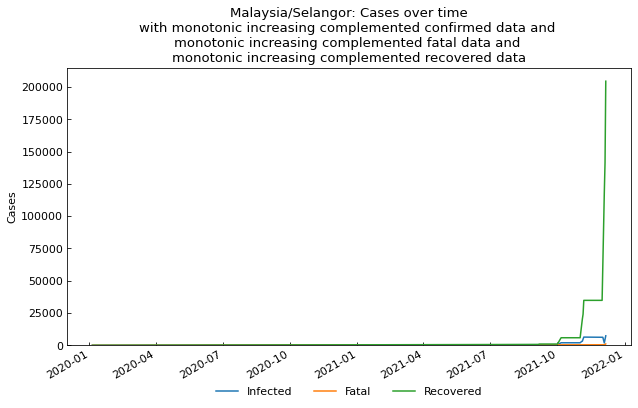

,Date,Infected,Fatal,Recovered
0,2020-01-05,-1,1,1
1,2020-01-06,-1,1,1
2,2020-01-07,-1,1,1
3,2020-01-08,-1,1,1
4,2020-01-09,-1,1,1


In [9]:
my_scenario.records().head()

In [25]:
my_scenario.trend()

ValueError: `ydata` must not be empty!

In [27]:
my_scenario.summary()

,Type,Start,End,Population
0th,Past,05Jan2020,04Jun2021,6530000
1st,Past,05Jun2021,05Aug2021,6530000
2nd,Past,01Sep2021,04Oct2021,6530000
3rd,Past,05Oct2021,05Dec2021,6530000


In [28]:
my_scenario.estimate(cs.SIRD)

KeyboardInterrupt: 

In [ ]:
my_scenario.summary()

In [ ]:
_ = my_scenario.history(target="Rt")

In [ ]:
my_scenario.clear(name="Main")
# my_scenario.add(days=425)
my_scenario.add(end_date="31DEC2021", name="Main")
main_sim_df = my_scenario.simulate(name="Main")

In [ ]:
main_sim_df.to_csv("Selangor_sim.csv", index = False)

In [ ]:
cs.SIRD.calc_r0()